In [12]:
for name in dir(): # removel old variables
    if not name.startswith('_'):
        del globals()[name]
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
n_genre=5 # number of top genre to be analyzed
#from imdb import IMDb
#tsv files downloaded from IMDB(https://datasets.imdbws.com/)
file_dir='./' #file path
df_basic= pd.read_csv(file_dir+'basic_data.tsv',sep='\t',encoding = "ISO-8859-1")
df_rating=pd.read_csv(file_dir+'rating_data.tsv',sep='\t',encoding = "ISO-8859-1")

In [13]:
#only analyze movies with more than 5000 votes
df_rating=df_rating[df_rating[df_rating.columns[2]]>5000]
#drop unused columns
df_basic.drop(['primaryTitle','originalTitle','endYear'],axis=1,inplace=True)
df_rating.set_index('tconst', inplace=True)
df_basic.set_index('tconst', inplace=True)
#joining data frames, matching the indices
df_all=df_rating.join(df_basic, how='outer').dropna()
df_all['numVotes']=df_all['numVotes'].astype(dtype='int32')
df_all['startYear']=df_all['startYear'].astype(dtype='int32')
df_all['runtimeMinutes']=df_all['runtimeMinutes'].convert_objects(convert_numeric=True)
df_all=df_all.dropna()
df_all['runtimeMinutes']=df_all['runtimeMinutes'].astype(dtype='int64')
df_all['genres']=df_all['genres'].str.split(',').str.get(0) #consider the first genre
df_all=df_all.dropna()
df_all.head()

c:\python\python37\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  # This is added back by InteractiveShellApp.init_path()


,averageRating,numVotes,titleType,isAdult,startYear,runtimeMinutes,genres
tconst,,,,,,,
tt0000010,6.9,5094,short,0,1895,1,Documentary
tt0000012,7.4,8537,short,0,1896,1,Documentary
tt0000417,8.2,36834,short,0,1902,13,Adventure
tt0000439,7.3,14451,short,0,1903,11,Action
tt0004972,6.7,19627,movie,0,1915,195,Drama


In [14]:
#automatically populate list of all genres from data
list_genres=df_all['genres'].drop_duplicates(keep="first")
#find trend of popularity fraction of top three genres (5 years intervals)
pf_popularity=df_all[['genres','startYear','numVotes']][(df_all['titleType']=='movie')]
pivot_popularity=pd.pivot_table(pf_popularity,index=["genres"],values = 'numVotes',aggfunc=np.sum).sort_values(by='numVotes', ascending=False, na_position='first')
list_genre=pivot_popularity.reset_index()['genres'].tolist()
list_genre


['Action',
 'Comedy',
 'Drama',
 'Adventure',
 'Crime',
 'Biography',
 'Horror',
 'Mystery',
 'Animation',
 'Documentary',
 'Fantasy',
 'Sci-Fi',
 'Western',
 'Family',
 'Thriller',
 'Romance',
 'Film-Noir',
 'Musical',
 'Music',
 'War',
 'Adult']

In [15]:
# number of votes data for genre analyzing by year
pd_plot_data_1=pd.DataFrame(index=[],columns=list_genre[0:n_genre])
for i in range(2018, 2018-5*15, -5):
    pd_popularity_5=pf_popularity[(pf_popularity['startYear']<=i)&(pf_popularity['startYear']>i-5)]
    pivot_popularity_5=pd.pivot_table(pd_popularity_5,index=["genres"],values = 'numVotes',aggfunc=np.sum).sort_values(by='numVotes', ascending=False, na_position='first')
    pd_plot_data_1.loc[str(i)]=np.NaN
    for j in range(0,n_genre):
        pd_plot_data_1.loc[str(i),list_genre[j]]=pivot_popularity_5.loc[list_genre[j],'numVotes']
pd_plot_data_1

,Action,Comedy,Drama,Adventure,Crime
2018,44017932.0,12449980.0,14069273.0,9941449.0,5348287.0
2013,50460137.0,25963145.0,21488216.0,19178418.0,7914166.0
2008,38059760.0,24269345.0,23432386.0,13788382.0,11382430.0
2003,28447084.0,18246302.0,15555681.0,12624869.0,8512920.0
1998,14234406.0,13847924.0,13278727.0,5930796.0,10576798.0
1993,8409084.0,8060667.0,4666724.0,4153633.0,5228544.0
1988,7894190.0,6236576.0,3929463.0,3781043.0,1331500.0
1983,4636558.0,2791842.0,2664000.0,1422017.0,989342.0
1978,2144486.0,1539598.0,2970292.0,1569123.0,1766450.0
1973,1274276.0,1076624.0,1003540.0,744711.0,2451606.0


In [16]:
# number of votes data for TV or MOVIE analyzing by year
pf_tv=df_all[['titleType','startYear','numVotes']][(df_all['titleType']=='movie')|(df_all['titleType']=='tvSeries')]
pivot_tv=pd.pivot_table(pf_tv,index=["titleType"],values = 'numVotes',aggfunc=np.sum).sort_values(by='numVotes', ascending=False, na_position='first')
list_type=['movie','tvSeries']
pd_plot_data_2=pd.DataFrame(index=[],columns=[(list_type[0]),(list_type[1])])
for i in range(2018, 2018-5*15, -5):
    pf_tv_5=pf_tv[(pf_tv['startYear']<=i)&(pf_tv['startYear']>i-5)]
    pivot_tv_5=pd.pivot_table(pf_tv_5,index=["titleType"],values = 'numVotes',aggfunc=np.sum).sort_values(by='numVotes', ascending=False, na_position='first')
    pd_plot_data_2.loc[str(i)]=0
    for j in range(0,2):
        try:
            pd_plot_data_2.loc[str(i),list_type[j]]=pivot_tv_5.loc[list_type[j],'numVotes']
        except:
            print('Warning!!',list_type[j],'movie type not found in',str(i),'-',str(i-1))
pd_plot_data_2

Warning!! tvSeries movie type not found in 1948 - 1947


,movie,tvSeries
2018,98385022,12371777
2013,145853775,16690299
2008,125671359,11807820
2003,93900096,5526011
1998,62961757,3597121
1993,34502986,2223161
1988,25908445,925637
1983,17189569,383015
1978,11979003,336468
1973,8026077,246287


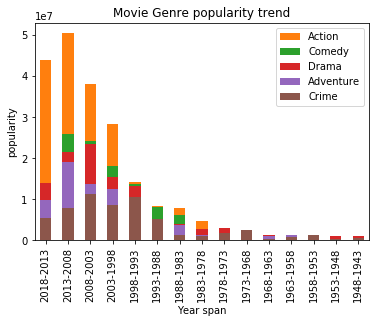

In [17]:
# prepare plot 1
pd_plot_data_1=pd_plot_data_1.reset_index()
pd_plot_data_1['index']=pd_plot_data_1['index'].astype('int32')
pd_plot_data_1['index']=pd_plot_data_1['index'].astype(str)+'-'+(pd_plot_data_1['index']-5).astype(str)
pd_plot_data_1.set_index("index",drop=True,inplace=True)
plot_1 = pd_plot_data_1.plot(y=list_genre[0], kind="bar",color="C1")
for j in range(1, n_genre):
    pd_plot_data_1.plot(y=list_genre[j], kind="bar", ax=plot_1,color="C"+str(j+1))
plot_1.set_xlabel("Year span")
plot_1.set_ylabel("popularity")
plot_1.set_title("Movie Genre popularity trend")
plt.show()


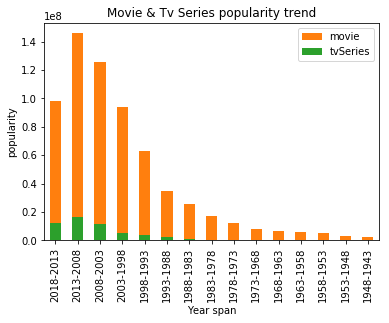

In [18]:
# prepare plot 2
pd_plot_data_2=pd_plot_data_2.reset_index()
pd_plot_data_2['index']=pd_plot_data_2['index'].astype('int32')
pd_plot_data_2['index']=pd_plot_data_2['index'].astype(str)+'-'+(pd_plot_data_2['index']-5).astype(str)
pd_plot_data_2.set_index("index",drop=True,inplace=True)
plot_2 = pd_plot_data_2.plot(y="movie", kind="bar",color="C1")
pd_plot_data_2.plot(y="tvSeries", kind="bar", ax=plot_2,color="C2")
plot_2.set_xlabel("Year span")
plot_2.set_ylabel("popularity")
plot_2.set_title("Movie & Tv Series popularity trend")
plt.show()

Two sets of different data (title.basics.tsv.gz and title.ratings.tsv.gz) were downloaded from https://datasets.imdbws.com/, IMDB dataset, showing data for movie basic information and rate and number of votes separately. The file in title.basics.tsv.gz was used to obtain movie basic information for each movie ID that was called from title.ratings.tsv.gz.
The purpose of this project is to analyze the number of voters on movies with various 'genre's and 'movie type's. The reason for choosing this project is, the number of votes could be an indicator of the market size, therefore movie industry should use this analyzation to predict the future market demand and plan accordingly to increase profit.
In this project first, a manually set number of top genres (5 for this code, adjustable) was investigated in 5-year intervals since 1948. The code uses the data sets to find the accumulative results of the voter to estimate genre popularity trend over time. Also, the trend of the total number of voters is shown in the first graph. The sharp growth of the voters could be as a result of easier access of users to the internet and are not very indicative and need more investigation. However, the pattern of genre popularity can be seen as a ratio of the total voters, therefore clearly shows how people's taste in movies changed over time. From 1943 to 1953, Drama genre was the most dominant movie taste among the people. From 1953 to 1998, shows a mix taste, but it is clear that Crime and Adventure genres grew rapidly. Since 1998, the Crime and Drama popularity are constantly dropping while Adventure movies kept the positive slop. It is very surprising that the Action movies, completely new Genre took the biggest share of the market since its birth around 1998 and its market is sharply growing.
The total number of voter since 2013 are dropping. At first, my guess was that the drop in movies popularity is because people are recently more attracted to TV series. But it turned out that I am wrong as I will explain in continue.
The second graph shows the popularity of Movies and TV shows over time. As the graph shows, there was nearly no attraction to TV series before 1983. But since then the popularity of the TV shows over movies is constantly growing, something that the Movie industry need to notice. But the same trend of voter dropping is followed in the second graph. It means that the popularity of Movies and TV shows are dropping among the people as the number of hobbies is constantly growing in the new century.